In [68]:
from qiskit import  Aer, ClassicalRegister, QuantumRegister, QuantumCircuit, execute
from qiskit.quantum_info.operators import Operator
# import basic plot tools
from qiskit.visualization import plot_histogram
import numpy as np

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s

In [69]:
def oracle2():
    oracle = Operator([
        [1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
        [0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
        [0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
        [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
        [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
        [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
        [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0],
        [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
        [0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0]
    ])
        
    return oracle


grover = QuantumCircuit(4)

oraculus = oracle2()


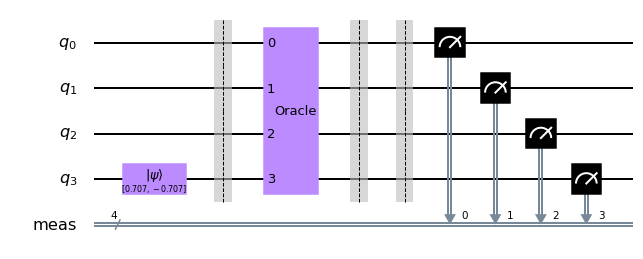

In [70]:


grover.initialize([1, -1]/np.sqrt(2), 3)
#grover.h([0,1,2,3])

grover.barrier()


iteration = 1
for i in range(iteration) :
    grover.unitary(oraculus, [0,1,2,3], label='Oracle')
    #grover.append(diffuser(3), [0,1,2])
    grover.barrier()


grover.measure_all()

grover.draw()

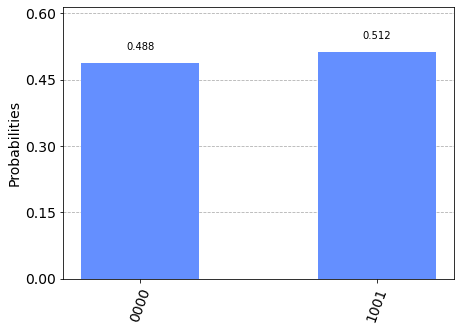

In [71]:
qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [72]:

#Old stuff

def oracle_old():
    qc = QuantumCircuit(15)

    for i in range(3) : 
        qc.x(5 * i + 1)
        
        qc.ccx(5 * i + 0, 5 * i + 1, 5 * i + 2)

        qc.x(5 * i + 0)
        qc.x(5 * i + 1)
            
        qc.ccx(5 * i + 0, 5 * i + 1, 5 * i + 3)

        qc.x(5 * i + 0)
    
    qc.barrier()

    for i in range(2) :
        qc.x(5 * i + 2)
        qc.x(5 * i + 3)
        
        qc.ccx(5 * i + 2, 5 * i + 3, 5 * i + 4)
        
        qc.x(5 * i + 2)
        qc.x(5 * i + 3)

    qc.ccx(12,9,7)
    qc.ccx(13,9,8)

    qc.ccx(7,4,2)
    qc.ccx(8,4,3)

    qc.cx(2, 14)

    #Uncompute
    qc.barrier()

    qc.ccx(8,4,3)
    qc.ccx(7,4,2)
    qc.ccx(13,9,8)
    qc.ccx(12,9,7)

    qc.barrier()

    for i in range(2) :
        qc.x(5 * i + 2)
        qc.x(5 * i + 3)
        
        qc.ccx(5 * i + 2, 5 * i + 3, 5 * i + 4)
        
        qc.x(5 * i + 2)
        qc.x(5 * i + 3)

    qc.barrier()

    for i in range(3) : 
        qc.x(5 * i + 0)
        
        qc.ccx(5 * i + 0, 5 * i + 1, 5 * i + 3)

        qc.x(5 * i + 1)
        qc.x(5 * i + 0)
        
        qc.ccx(5 * i + 0, 5 * i + 1, 5 * i + 2)    
        
        qc.x(5 * i + 1)
    return qc